In [1]:
import pandas as pd
import numpy as np
import pycaret as pc
from utils import utils

In [2]:
feature_df_6 = pd.read_csv('data/color_refined_molecules_6_hop.csv', index_col=0)
feature_df_5 = pd.read_csv('data/color_refined_molecules_5_hop.csv', index_col=0)
target_df = utils.load_graph_repersentations()[['target']]

In [3]:
df =  pd.concat([feature_df_5,feature_df_6, target_df], axis=1)
holdout_df = df.loc[:1200,:] # ~ 10% of rows

in_sample_df = df.loc[1200:,:]

In [4]:
df.shape, in_sample_df.shape, holdout_df.shape
del holdout_df
del df

In [5]:
feature_df = in_sample_df.iloc[:,:-1]
target_df = in_sample_df.iloc[:,-1]
feature_df.columns = [a for a in range(feature_df.shape[1])]
feature_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
target_df

1200     0
1201     0
1202     0
1203     0
1204     0
        ..
12087    0
12088    0
12089    0
12090    0
12091    0
Name: target, Length: 10892, dtype: int64

In [10]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=.2,random_state =123)


pca_model = PCA(2000)
pca_model.fit(X_train)
X_train, X_test = pca_model.transform(X_train), pca_model.transform(X_test)



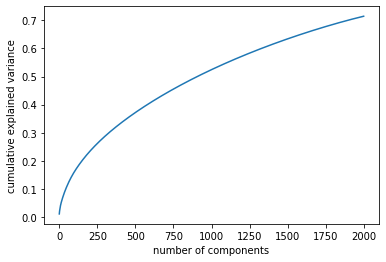

In [11]:
import matplotlib.pyplot as plt
# source: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [12]:
from lazypredict.Supervised import LazyClassifier


model = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = model.fit(X_train, X_test, y_train, y_test) # very slow with 2k features
models


  3%|▎         | 1/29 [01:23<38:46, 83.08s/it]